# COGS 108 - Analysis of possible relationship between medical expenditure in the US and potential factors

## Please use collection time: Friday

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Overview

In the United State, people commonly have high medical expenditures. There are many features are associated with higher medical expenditure. With our analysis, we will find how age, BMI indicator, working hours, smoking behavior, individual region, and racial characteristics are related to medical expenditure. Using a multivariate OLS model, we found that older people and higher BMI could cause high medical expenditure. Working Hours and smoking behavior have a negative correlation with medical expenditure. Also, an individual’s region and racial characteristics are correlated with medical expenditure. 

# Names

- Baoni Li
- Huiyi He
- Jiayi Zhu
- Yuhan Zhou
- Yihuan Wang

<a id='research_question'></a>
# Research Question

What factors are associated with higher medical expenditure in adults in the United States? Specifically, are there relationships between medical costs and demographic factors such as age, working hours, and BMI, as well as health-related behaviors such as smoking behavior and overall lifestyle choices? If there are statistically significant relationships between these features and medical expenditure, are they positively or negatively associated?

<a id='background'></a>

## Background & Prior Work

The issue of people's health has always been a hot topic in society. “The United States has one of the highest costs of healthcare in the world. In 2021, U.S. healthcare spending reached 4.3 trillion dollars, which averages to about $ 12,900 per person”[^peter]. There are some reasons for the rising healthcare costs. One is the aging population. “According to the U.S. Census Bureau, 21 percent of the entire population will be age 65 or older by 2030”[^margot]. Chronic disease prevalence is another. 

Healthcare expenditure is a critical indicator of a country’s health status, as it reflects the level of medical resources dedicated to improving the health of its citizens. Despite being one of the wealthiest countries in the world, many U.S. adults have trouble affording medical costs. “About half of U.S. adults say that it is very or somewhat difficult for them to afford their health care costs (47%). Adults in households with annual incomes under 40,000 are more than three times as likely as adults in households with incomes over $90,000 to say it is difficult to afford their health care costs (69% v. 21%)”[^alex]. Therefore, it is worth investigating the factors that may contribute to high medical costs. Data science has a wide range of applications in healthcare expenditure analysis, such as predictive modeling, cost analysis and comparative effectiveness research. From our prior work, we found that “most people are terrible at picking the health plan that is right for them”[^definitive]. If people can predict their body changes in the near future based on their body indicators and lifestyles, it will be much easier to select the most appropriate healthcare insurance plans for themselves. These research techniques help the general public choose better healthcare insurance plans, assist healthcare providers to make data-driven decisions and improve the efficiency and effectiveness of healthcare systems. 

We have found a few projects on the relationship between certain characteristics and healthcare expenditure in the United States. For example, Ward et al. discuss the association of BMI with Healthcare expenditures in the U.S. and make predictions using generalized additive models. Their conclusion is that “higher healthcare costs are associated with excess body weight across a broad range of ages and BMI levels” [^ward]. We believe that we could create finer models to predict more accurate medical costs by considering a dataset with more personal features of the participants. 

[^peter]: Peter G. Peterson Foundation (30 Jan 2023) Why Are Americans Paying More For Healthcare. https://www.pgpf.org/blog/2023/01/why-are-americans-paying-more-for-healthcare#:~:text=How%20Much%20Does%20the%20United,to%20about%20%2412%2C900%20per%20person

[^margot]: Margot Sanger-Katz (11 Dec 2020) It’s Not Just You: Picking a Health Insurance Plan Is Really Hard. *The New York Times*. https://www.nytimes.com/2020/12/11/upshot/choosing-health-insurance-is-hard.html

[^alex]: Alex Montero (14 Jul 2022) Americans’ Challenges with Health Care Costs *Kaiser Family Foundation*. https://www.kff.org/health-costs/issue-brief/americans-challenges-with-health-care-costs/

[^definitive]: Definitive Healthcare (Aug 2022) 5 reasons why healthcare costs are rising. *Definitive Healthcare*. https://www.definitivehc.com/blog/5-reasons-why-healthcare-costs-are-rising

[^ward]: Ward, Zachary J., et al. (24 Mar 2021) Association of Body Mass Index with Health Care Expenditures in the United States by Age and Sex. PLOS ONE, vol. 16, no. 3, 2021, https://doi.org/10.1371/journal.pone.0247307. 

# Hypothesis

We believe age is the most common cause for the high medical expenditure in the United States based on our background research and intuitions, as we think older people tend to have higher medical costs than younger people because we expect older people to be more susceptible to chronic diseases. In addition, there is a positive correlation between working hours and medical expenditure because we believe longer working hours might lead to worse health conditions. We also agree medical expenditure has a positive correlation with BMI people with higher BMI are more likely to have a higher risk for diseases such as obesity, diabetes, and cardiovascular diseases. Lastly, lifestyle differences can cause differences in medical spending. For example, people who lead unhealthy lifestyles such as smoking will have an increased risk of smoking-related illnesses such as cancer, heart disease, and respiratory diseases and may have higher medical costs than those who lead healthy lifestyles.

# Dataset(s)

The intended datasets for this project would be a large number of medical-related data collected from individuals randomly within the U.S. population which have spanned a series of years (e.g. data taken from individuals randomly from population in a 10-year interval). Specific information taken from each individual should include their annual medical expenditure, average working hours per week, body mass index, and individual's habit of smoking. It’s best for the data to be in a column data spreadsheet with the year of collection included so we can analyze the effect of time.


The datasets we got are all collected from the Medical Expenditure Panel Survey, which is a national survey conducted by the Agency for Healthcare Research and Quality (AHRQ) that collects data on healthcare utilization and expenditures. Each dataset contains information on the given variables for a year, combined, they represent data collected from 2011-2020.

# Setup

In [1]:
import pandas as pd
import numpy as np
import os

# pip install the following before import
import pyreadstat as pyreadstat
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


# Data Cleaning

The original Dataframe has over 100,000 observations and 1000 columns, yet we only need less than 20 variables, so large amount of data cleaning has to be done, we first cut down the number of columns in the dataframe, merging serveral columns as needed. Then for the purpose of regression, we create dummy variables regarding region, smoking habits, and race. At last, we dropped rows that contains outliers for our numerical variables (age, hours worked, medical expenditure, Body Mass Index)

First, we are cleaned the dataframe, keeping all the columns we need.

In [2]:
# # Read each dta file and store them in a list of dataframes
# path = r'C:\Users\jojo1\OneDrive\Documents\UCSD\UCSD WI23\COGS 108\project'
# files_dta = [file for file in os.listdir(path) if file.endswith('.dta')]

# dfs = pd.DataFrame()
# yrlst = np.arange(11,21,1)
# for i in range(len(files_dta)):
#     filepath = os.path.join(path, files_dta[i])
#     df, meta = pyreadstat.read_dta(filepath)
#     df['YEAR'] = np.repeat(yrlst[i], df.shape[0])
#     df = df.rename(columns={col: col.replace(str(yrlst[i]), '_FINAL') for col in df.columns if str(yrlst[i]) in col})
#     dfs = pd.concat([dfs, df])

# dfs2 = dfs[['OFTSMK53', 'ADSMOK42', 'ADBMI42', 'BMINDX53', 'HOUR31', 
#             'HOUR42', 'HOUR53', 'AGE_FINALX', 
#             'RACEWX', 'RACEBX', 'RACEAX', 'RACETHNX', 'RACETHX',
#             'REGION53', 'REGION42', 'REGION31', 'REGION_FINAL', 
#             'YEAR', 'TOTEXP_FINAL']]

# dfs2 = dfs2.reset_index()
# dfs2 = dfs2.rename(columns={'index' : 'index_within_yr'})

# # Clean region columns 
# def drop_null_regions(df):
#     slice1 = df[df['REGION_FINAL'] == -1].copy()
#     slice2 = slice1[slice1['REGION53'] == -1].copy()
#     slice3 = slice2[slice2['REGION42'] == -1].copy()
#     slice4 = slice3[slice3['REGION31'] == -1].copy()

#     if slice4.shape[0] == 0:
#         None
#     else:
#         df.drop(index=[slice4.index])

# # merging regions
# def merge_region(row):
#     if row['REGION_FINAL'] == -1:
#         if row['REGION53'] == -1:
#             if row['REGION42'] == -1:
#                 return f"{row['REGION31']}"
#             else:
#                 return f"{row['REGION42']}"
#         else:
#             return f"{row['REGION53']}"
#     else:
#         return f"{row['REGION_FINAL']}"

    
# dfs2['REGION_Merged'] = dfs2.apply(merge_region, axis=1)
# dfs2.drop(columns=['REGION_FINAL', 'REGION53', 'REGION42', 'REGION31'])

# """ since it take too long to run the above codes, we are going to export the 
# half cleaned dataset(dfs2) to our repo, so that we won't waste too much time 
# running the above code each time we restart the kernel
# """
# dfs2.to_stata('mydata.dta')

More cleaning 

In [3]:
df = pd.read_stata('mydata.dta')
df = df.fillna(0)
df = df.drop(columns=['REGION_FINAL', 'REGION53', 'REGION42', 'REGION31'])
# Drop BMI
bmi_df = df.get(['ADBMI42', 'BMINDX53'])
df = df[(bmi_df > 0).any(axis=1)]
df['BMI_Merged'] = bmi_df.apply(lambda frame: (frame['ADBMI42'] 
                                + frame['BMINDX53'])/2 if (frame['ADBMI42'] 
                                > 0 and frame['BMINDX53'] > 0) else max(frame['ADBMI42'], frame['BMINDX53']), axis=1)
df.get(['BMI_Merged'])
df = df.drop(columns = ['ADBMI42', 'BMINDX53'])
# Drop Smoking
smoke_df = df.get(['OFTSMK53', 'ADSMOK42'])
df = df[(smoke_df > 0).any(axis=1)]
df['SMOKE_Merged'] = smoke_df.apply(lambda frame: (frame['OFTSMK53'] 
                                + frame['ADSMOK42'])/2 if (frame['OFTSMK53'] 
                                > 0 and frame['ADSMOK42'] > 0) else max(frame['OFTSMK53'], frame['ADSMOK42']), axis=1)
df.get(['SMOKE_Merged'])
df = df.drop(columns = ['OFTSMK53', 'ADSMOK42'])
df = df[df['AGE_FINALX'] >= 21.0]
hour=df[['HOUR31','HOUR42','HOUR53']]
hour = hour.applymap(lambda x: np.nan if x <= 0 else x)
hour = hour.dropna(how='all')
hour['num_notna']=hour.notna().sum(axis=1)
hour=hour.fillna(0)
hour['sum']=hour['HOUR31']+hour['HOUR42']+hour['HOUR53']
hour['HOUR_Merged']=hour['sum']/hour['num_notna']
hour=hour['HOUR_Merged']
final=df.merge(hour,how='right',right_index=True,left_index=True)
final=final.drop(columns=['HOUR31','HOUR42','HOUR53','index','index_within_yr']).reset_index()
final=final.drop(columns='index')
# merge race
final.loc[final['RACETHX'] == 0, 'RACETHX'] = final['RACETHNX']
final = final.drop(columns=['RACETHNX'])
# adjust for inflation in total expenditure
# the inflation rate is acquired from:
# https://www.aier.org/cost-of-living-calculator/
inflation = pd.DataFrame({'year': np.arange(11,21,1),
                          'value': [100, 102.07, 103.56, 105.24, 105.37, 
                                    106.70, 108.97, 111.63, 113.66, 115.06]})
for i in np.arange(11,21,1):
    final.loc[final['YEAR'] == i, 'TOTEXP_FINAL'] = final['TOTEXP_FINAL'] / inflation.value[i - 11] * 100

final['TOTEXP_FINAL'] = final['TOTEXP_FINAL'].round(2)
final = final[['TOTEXP_FINAL', 'AGE_FINALX', 'RACEWX', 'RACEBX', 'RACEAX', 'RACETHX', 'YEAR', 'REGION_Merged', 
               'BMI_Merged', 'SMOKE_Merged', 'HOUR_Merged']]
# final.head()

The above dataframe illustrates all the information we need. Next, since we are planning on runing the data with a multivariate linear regression model, we will clean the data more to make it suitable for a regression.

Creating dummy variables

In [4]:
# Further manipulation data for regression
# Change race variables to dummy variables
final.loc[final['RACEWX'] != 3, 'RACEWX'] = 1
final.loc[final['RACEWX'] == 3, 'RACEWX'] = 0
final.loc[final['RACEAX'] != 3, 'RACEAX'] = 1
final.loc[final['RACEAX'] == 3, 'RACEAX'] = 0
final.loc[final['RACEBX'] != 3, 'RACEBX'] = 1
final.loc[final['RACEBX'] == 3, 'RACEBX'] = 0
final.loc[final['RACETHX'] != 1, 'RACETHX'] = 0

# Change region variables to dummy variables
final['REGION_NORTHEAST'] = 0
final['REGION_MIDEAST'] = 0
final['REGION_SOUTH'] = 0
final.loc[final['REGION_Merged'] == str(1.0), 'REGION_NORTHEAST'] = 1
final.loc[final['REGION_Merged'] == str(2.0), 'REGION_MIDEAST'] = 1
final.loc[final['REGION_Merged'] == str(3.0), 'REGION_SOUTH'] = 1

# Change smoke variables to dummy
final['SMOKE'] = 0
final.loc[final['SMOKE_Merged'] != 3.0, 'SMOKE'] = 1

Dropping outliers, we are going visualize the statistical properties of select columns and decided on the method to use for dropping outliers.

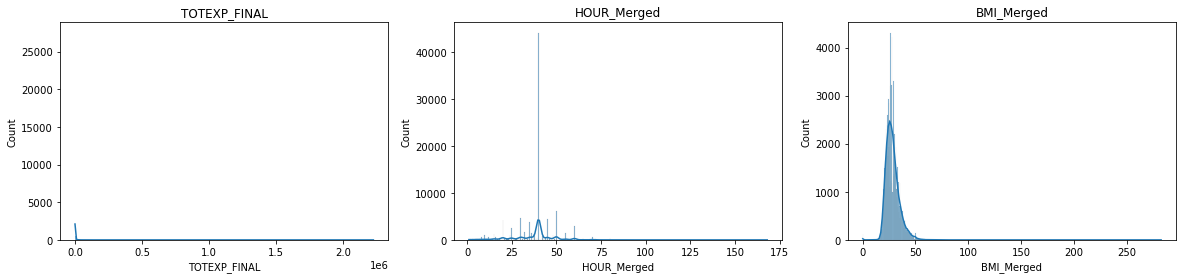

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


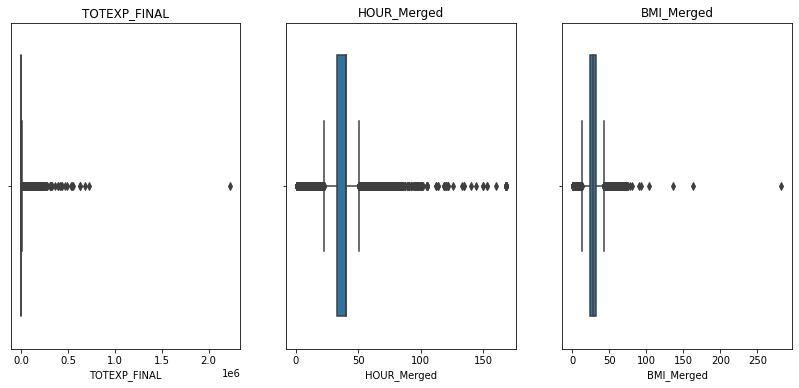

In [5]:
# Dropping outliers
# See distribution in boxplot to determine cutoff for outliers
f1, ax1 = plt.subplots(1, 3, figsize=(20, 4))
sns.histplot(final.TOTEXP_FINAL, kde=True, ax=ax1[0])
ax1[0].set_title('TOTEXP_FINAL')
sns.histplot(final.HOUR_Merged, kde=True, ax=ax1[1])
ax1[1].set_title('HOUR_Merged')
sns.histplot(final.BMI_Merged, kde=True, ax=ax1[2])
ax1[2].set_title('BMI_Merged')
plt.show()

f2, ax2 = plt.subplots(1, 3, figsize=(14, 6))
sns.boxplot(final.TOTEXP_FINAL, ax=ax2[0])
sns.boxplot(final.HOUR_Merged, ax=ax2[1])
sns.boxplot(final.BMI_Merged, ax=ax2[2])
ax2[0].set_title('TOTEXP_FINAL')
ax2[1].set_title('HOUR_Merged')
ax2[2].set_title('BMI_Merged')
plt.show()

Above are the distributions for total annual medical expenditure(TOTEXP_FINAL), hours worked per week(HOUR_Merged), and Body Mass Index(BMI_Merged) before outliers were dropped. We can see all variabes resembles outliers near the upper bounds.

In [6]:
# decide on the cutoff for outliers based on distribution, for now use (95, 5)
# decided to use the Z-score method (2 standard deviations away from the mean) as determinant for 
# outliers for BMI and hours worked since they resemble a normal distribution
# get stds
std_hour = final['HOUR_Merged'].std()
std_bmi = final['BMI_Merged'].std()
# and use the IQR method for exp since the data is not normal
q1_exp = final['TOTEXP_FINAL'].quantile(0.25)
q3_exp = final['TOTEXP_FINAL'].quantile(0.75)
iqr = q3_exp - q1_exp
# get bounds
exp_lower = q1_exp - 1.5 * iqr
exp_upper = q3_exp + 1.5 * iqr
hour_lower = final.HOUR_Merged.mean() - std_hour * 2
hour_upper = final.HOUR_Merged.mean() + std_hour * 2
bmi_lower = final.BMI_Merged.mean() - std_bmi * 2
bmi_upper = final.BMI_Merged.mean() + std_bmi * 2
final = final.drop(index=final[final['TOTEXP_FINAL'] >= exp_upper].index)
final = final.drop(index=final[final['TOTEXP_FINAL'] <= exp_lower].index)
final = final.drop(index=final[final['HOUR_Merged'] >= hour_upper].index)
final = final.drop(index=final[final['HOUR_Merged'] <= hour_lower].index)
final = final.drop(index=final[final['BMI_Merged'] >= bmi_upper].index)
final = final.drop(index=final[final['BMI_Merged'] <= bmi_lower].index)
# final.head()

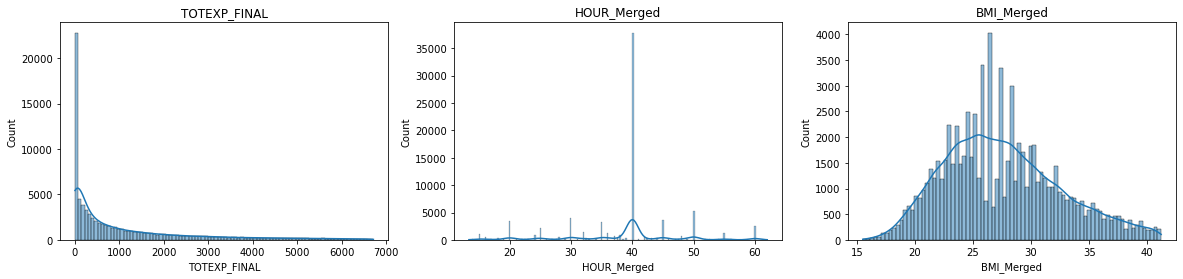

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


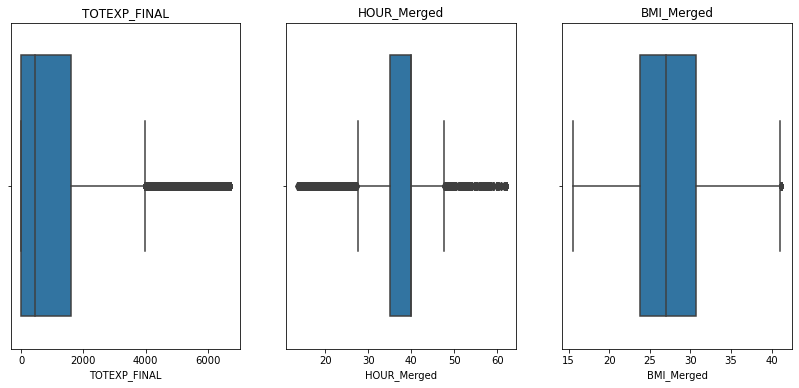

In [7]:
# see distribution after dropping outliers
f3, ax3 = plt.subplots(1, 3, figsize=(20, 4))
sns.histplot(final.TOTEXP_FINAL, kde=True, ax=ax3[0])
ax3[0].set_title('TOTEXP_FINAL')
sns.histplot(final.HOUR_Merged, kde=True, ax=ax3[1])
ax3[1].set_title('HOUR_Merged')
sns.histplot(final.BMI_Merged, kde=True, ax=ax3[2])
ax3[2].set_title('BMI_Merged')
plt.show()

f4, ax4 = plt.subplots(1, 3, figsize=(14, 6))
sns.boxplot(final.TOTEXP_FINAL, ax=ax4[0])
ax4[0].set_title('TOTEXP_FINAL')
sns.boxplot(final.HOUR_Merged, ax=ax4[1])
ax4[1].set_title('HOUR_Merged')
sns.boxplot(final.BMI_Merged, ax=ax4[2])
ax4[2].set_title('BMI_Merged');

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


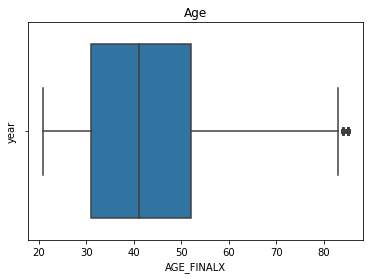

In [8]:
sns.boxplot(final.AGE_FINALX).set(title='Age', ylabel='year');

Summary of variables after dropping outliers, observe all variables are free from outliers, in addtion, observe age variable does not need further cleaning as does not contain outliers.

# Data Analysis & Results (EDA)

To carry out analysis around our research questions, we decided to first perform a multivariate linear regression on the variables in our interest. Followed by detail exploration on the relationships of medical expenditures with other variables one at a time.

## Medical expenditure overtime

[Text(0.5, 1.0, 'Medical expenditure overtime')]

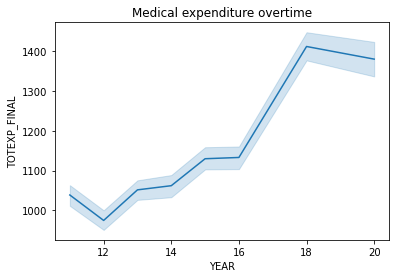

In [9]:
# time series on exp ,INFLATION ADJUSTED!
sns.lineplot(x='YEAR', y='TOTEXP_FINAL', data=final).set(title="Medical expenditure overtime")

A line plot is a great way to visualize changes in total medical expenditure over time because a line plot displays data points as individual marks along an axis, and connects them with lines to show the overall trend over time. We set the x-axis as YEAR, which is from 2011 to 2020, and the y-axis as Total medical expenditure. By looking at the line plot describing the total medical expenditure from 2011 to 2020, we can see the total medical expenditure is decreasing from 2011 to 2012, and keep increasing from 2012 to 2018, and slightly decreasing from 2018 to 2020. The overall trend of total medical expenditure from 2011 to 2020 increased. Because we already adjust the price inflation problem, we can conclude that the increase of total medical expenditure is caused by other factors. What features cause changes in total medical expenditure is the question we will discuss in the next step.

## Regression results

In [10]:
# Run linear regression

y = final['TOTEXP_FINAL']
X = final[['RACEWX', 'RACEBX', 'RACEAX', 'RACETHX', 
          'REGION_NORTHEAST', 'REGION_MIDEAST', 'REGION_SOUTH', 
          'SMOKE', 'BMI_Merged', 'HOUR_Merged', 'AGE_FINALX']]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:           TOTEXP_FINAL   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     716.9
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        06:49:25   Log-Likelihood:            -6.9368e+05
No. Observations:               79794   AIC:                         1.387e+06
Df Residuals:                   79782   BIC:                         1.387e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               74.3493     53.052  

Oberve all P-values for estimator coefficients are less than 0.05, implies statisticall signifacne for all.

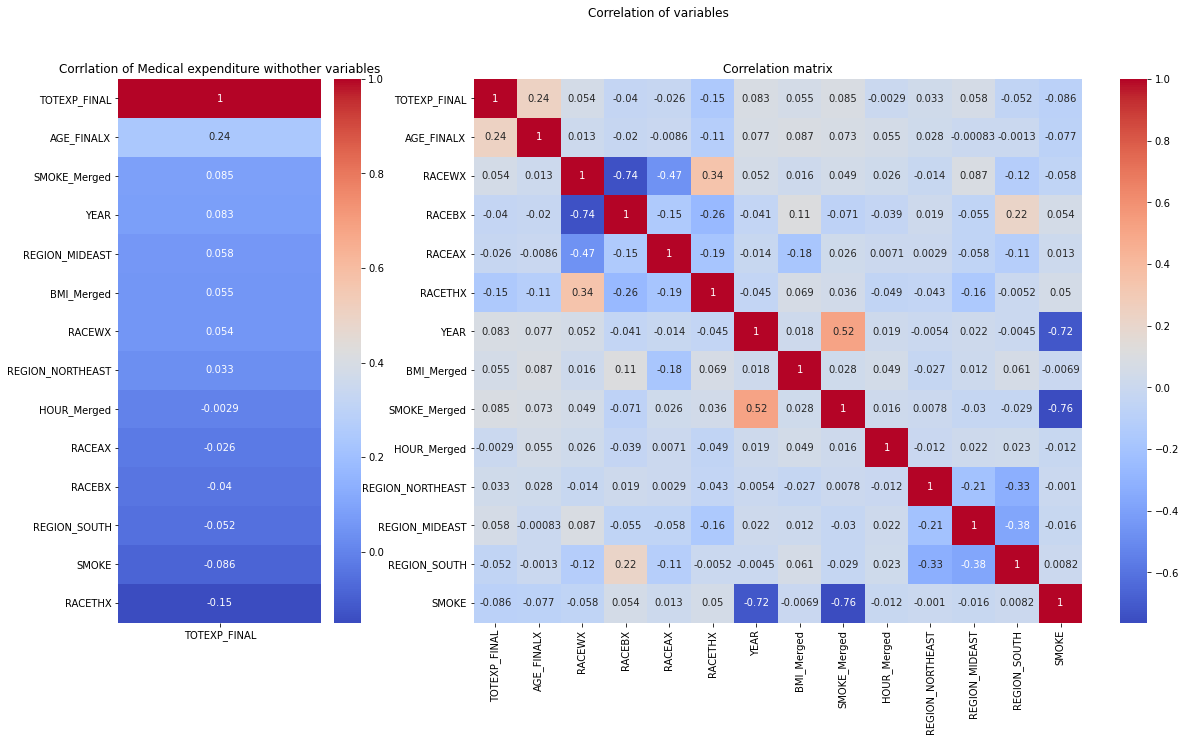

In [11]:
# covariance matrix
corr_matrix = final.corr()
f1, ax1 = plt.subplots(1, 2, figsize=(20, 10), gridspec_kw={'width_ratios': [1, 3]})
(sns.heatmap(corr_matrix.iloc[:, :1].sort_values(by='TOTEXP_FINAL', ascending=False), annot=True, cmap='coolwarm', ax=ax1[0])
 .set(title="Corrlation of Medical expenditure withother variables"))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm' ,ax=ax1[1]).set(title="Correlation matrix")
f1.suptitle('Correlation of variables')
plt.show()

Above are the correlation coefficient of variables in the regression, illustrates the linear relationship between variables, observe age have the highest correlation with expenditure of 0.24 among other variables.

## Age and Medical expenditure

[Text(0.5, 1.0, 'Distribution of Age')]

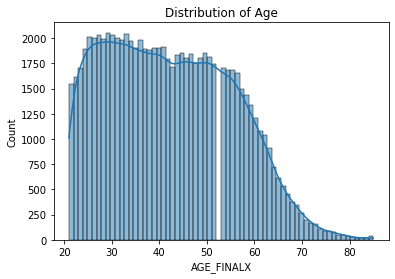

In [12]:
sns.histplot(final.AGE_FINALX, kde=True).set(title="Distribution of Age")

Above plot visualises the distribution of age

From our OLS estimator, observe variable AGE is statistially significant with value of 24.3225, implies keeping all else constant, our model estimates on average a 24.3225$ increase on medical expenditure with one additional year of age. 

## BMI and Medical expenditure

[Text(0.5, 1.0, 'Distribution of BMI')]

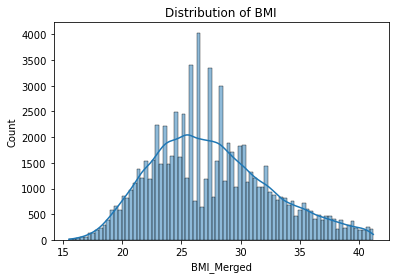

In [13]:
# distribution on BMI
sns.histplot(final.BMI_Merged, kde=True).set(title="Distribution of BMI")


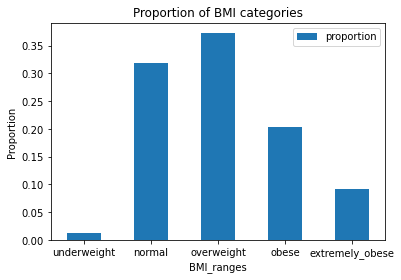

In [14]:
#BMI ranges
underweight_prop = np.count_nonzero(final['BMI_Merged'] < 18.5)/final.shape[0]
normal_prop = np.count_nonzero((final['BMI_Merged'] >= 18.5) & (final['BMI_Merged'] < 25))/final.shape[0]
overweight_prop = np.count_nonzero((final['BMI_Merged'] >= 25) & (final['BMI_Merged'] < 30))/final.shape[0]
obese_prop = np.count_nonzero((final['BMI_Merged'] >= 30) & (final['BMI_Merged'] < 35))/final.shape[0]
extremely_obese_prop = np.count_nonzero(final['BMI_Merged'] >=35)/final.shape[0]

data = {'BMI_ranges': ['underweight', 'normal', 'overweight', 'obese', 'extremely_obese'], 
       'proportion': [underweight_prop, normal_prop, overweight_prop, obese_prop, extremely_obese_prop]}

prop_df = pd.DataFrame(data)
prop_df.plot(kind = 'bar', x = 'BMI_ranges', rot=0, ylabel = 'Proportion', title = "Proportion of BMI categories");

We can see that the BMI values follow a slightly right-skewed normal distribution. We see a peak in the distribution towards the left side of the graph, with a tail extending towards the right side, indicating that there are relatively more individuals with BMI values ranging between 20 and 30 than those with BMI values lower than 20 and greater than 35. Thus, most people are normal and slightly overweight and less are underweight, obese and extremely obese. 

From the proportion plot, we can see the same trend more clearly where approximately the same proportion of people are normal and overweight. The proportions of people who are obese and extremely obese are relatively lower but still significantly higher than that of people who are underweight. 

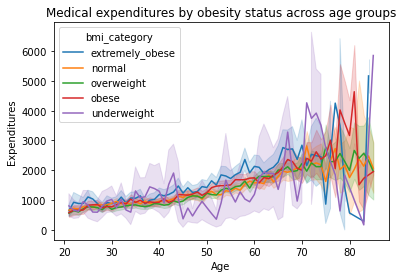

In [15]:
def bmi_range(bmi):
    if bmi < 18.5:
        return 'underweight'
    elif (bmi >= 18.5) & (bmi < 25):
        return 'normal'
    elif (bmi >= 25) & (bmi < 30):
        return 'overweight'
    elif (bmi >= 30) & (bmi < 35):
        return 'obese'
    else:
        return "extremely_obese"

final_bmi = final.assign(bmi_category = final.get('BMI_Merged').apply(bmi_range))

sns.lineplot(x = 'AGE_FINALX', y = 'TOTEXP_FINAL', hue = 'bmi_category', data = final_bmi).set(
    title = 'Medical expenditures by obesity status across age groups', xlabel = 'Age', ylabel = 'Expenditures');

The line plot above shows medical expenditures by obesity status revealed a general increase in costs across all groups by age. The fluctuations might be a result of medical insurance coverages but we see that extremely obese and underweight peoplehave higher medical expenditures across all age groups. Obese people follow a similar pattern but with slightly lower increases. Therefore, people with more extreme BMI values tend to have higher medical expenditures.

## Hours worked per week and Medical expenditure

[Text(0.5, 1.0, 'Distribution of hours worked per week')]

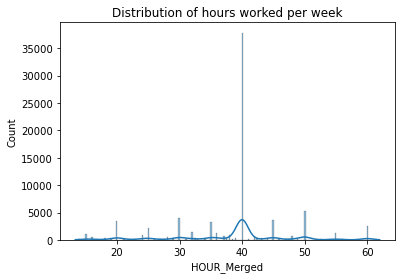

In [16]:
# distribution on hours worked
sns.histplot(final.HOUR_Merged, kde=True).set(title="Distribution of hours worked per week")

The graph shows the distribution of the column 'HOUR_Merged',which represents the working hour of people in a week. According to the graph we drew, people's working hours range from a low of 13.33 hours to a high of 62 hours, with a peak at 40 hours and an average working hours of 38.38 hours per week. From the graph, we observe that people's working hours tend to concentrate on 20, 30, 40, 50 and 60 hours. We speculate that this is because people prefer to round their working hours to the nearest 10 when filling in their information.

## Smoke and Medical expenditure

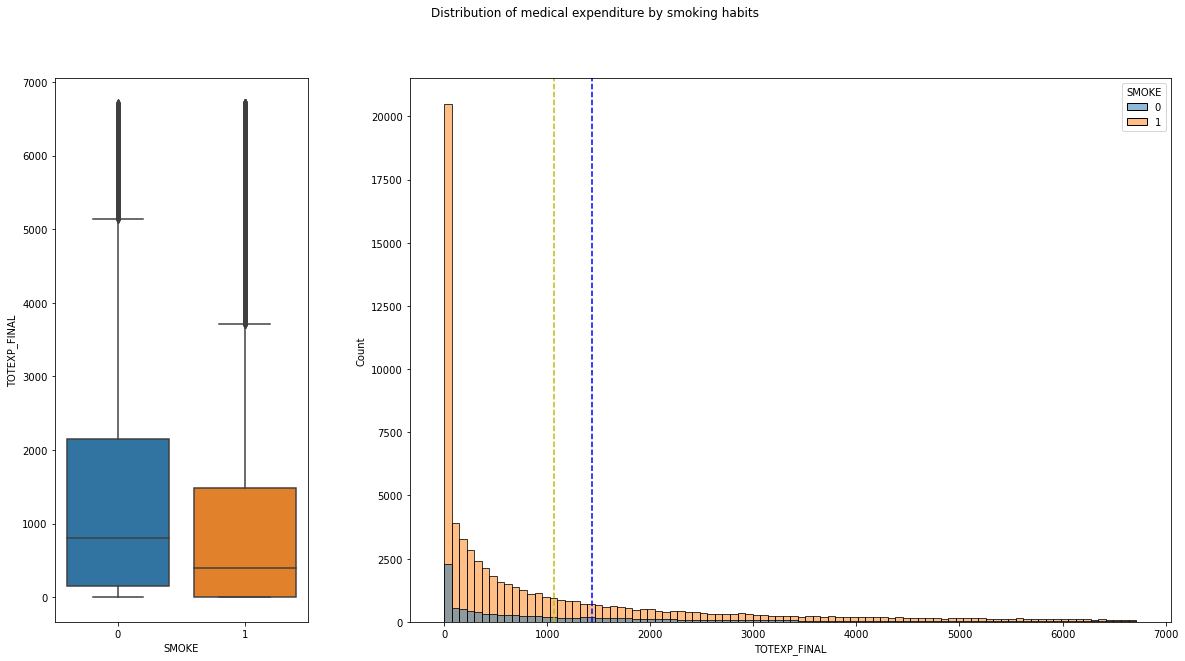

In [17]:
# distribution smoking and no smoking
f2, ax2 = plt.subplots(1, 2, figsize=(20, 10), gridspec_kw={'width_ratios': [1, 3]})
sns.boxplot(x='SMOKE', y='TOTEXP_FINAL', data=final, ax=ax2[0])
sns.histplot(hue='SMOKE', x='TOTEXP_FINAL', data=final[['TOTEXP_FINAL', 'SMOKE']], ax=ax2[1]);
ax2[1].axvline(final[final.SMOKE == 1]['TOTEXP_FINAL'].mean(), color='y', linestyle='--')
ax2[1].axvline(final[final.SMOKE == 0]['TOTEXP_FINAL'].mean(), color='b', linestyle='--')
f2.suptitle('Distribution of medical expenditure by smoking habits')
plt.show()

From this boxplot, we can see that the mean expenditure of people not smoke is about 800, but that of people smoke is about 500. In general, people not smoke will cost more expenditure and larger range of expenditure.

In our OLS regression result, we can see that the coeficient of smoke feature is -234.7292, implying that smoking has a negative relationship with total expenditure.

There are some limitations of our prediction: 1). smoker may sign with a higher medical insurance: medical insurance will cover the most of parts when smokers ill. 2). smoker may not seek medical care: they may underestimate their symptoms, and will not go to hospital until the condition becomes more servere. 3). smoker not really care their health: Besides smoking, they have other unhealth behaviours, but smokers do not care 4). smoker may die ealier: unhealth behaviours will push them to have a bad health condition, then they may die ealier Therefore, our result shows that smoking will cause less expenditure in general.

## Region and Medical expenditure

To perform analyzation on the relationship between region and medical expenditure, we first recall our regression estimators regarding region, and illustrate the distribution of expenditure differs by region.

Region coefficients: 
                   coefficients      p_values
REGION_NORTHEAST      60.687548  2.476504e-04
REGION_MIDEAST        50.239643  1.433704e-03
Dummy_region_west      0.000000           NaN
REGION_SOUTH        -103.556913  8.023678e-15


[Text(0.5, 1.0, 'Region Parameter Coefficients'),
 Text(0, 0.5, 'Dollars per year')]

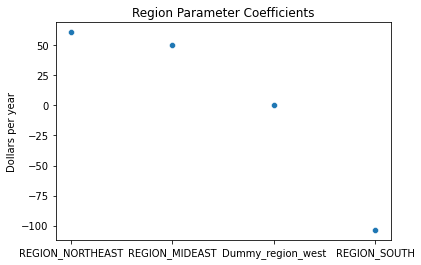

In [18]:
# Extract the coefficients for the variables of interest, insert our anchor variable
region_coeffs = model.params[['REGION_NORTHEAST', 'REGION_MIDEAST', 'REGION_SOUTH']]
region_pvals = model.pvalues[['REGION_NORTHEAST', 'REGION_MIDEAST', 'REGION_SOUTH']]
region_coeffs['Dummy_region_west'] = 0
region_pvals['Dummy_region_west'] = np.nan
region_comb = pd.concat([region_coeffs, region_pvals], axis=1)
region_comb = region_comb.rename(columns={0 : 'coefficients', 1 : 'p_values'})
# Print the coefficients
print(f'Region coefficients: \n{region_comb.sort_values("coefficients", ascending=False)}')
sns.scatterplot(data=region_coeffs.sort_values(ascending=False)).set(title='Region Parameter Coefficients', ylabel='Dollars per year')

Dot plot showing estimator coefficients for all dummy region variables in ascending order

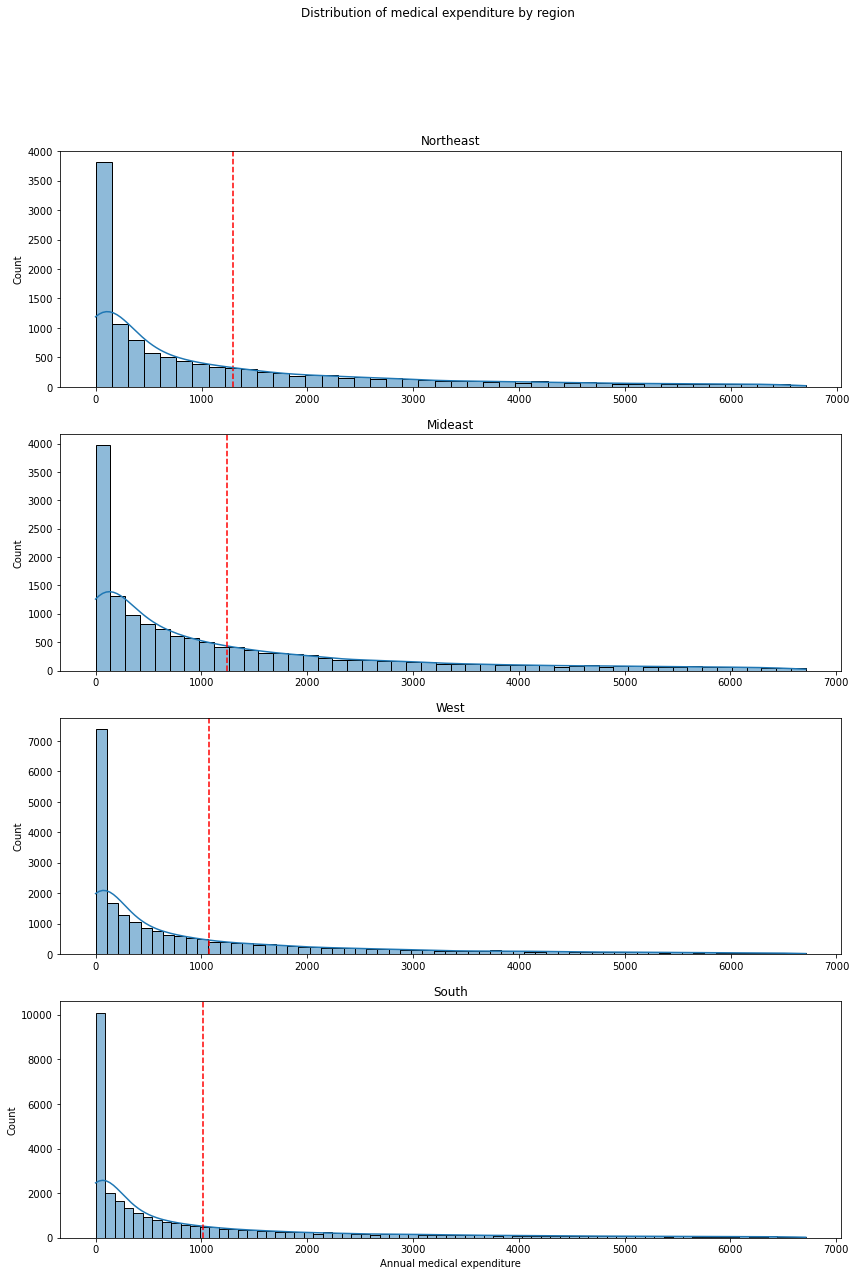

In [19]:
# f6, ax6 = plt.subplots(1, 4, figsize=(20, 20))
# f6.suptitle('Variability of medical expenditure by region')
# sns.boxplot(y='TOTEXP_FINAL', data=final[final.REGION_MIDEAST == 1], ax=ax6[0]).set(ylabel = 'Annual medical expenditure', 
#                                                                                     title = 'Mideast')
# sns.boxplot(y='TOTEXP_FINAL', data=final[final.REGION_NORTHEAST == 1], ax=ax6[1]).set(ylabel = '', title = 'Northeast')
# sns.boxplot(y='TOTEXP_FINAL', data=final[(final.REGION_NORTHEAST == 0) &
#                                          (final.REGION_MIDEAST == 0) &
#                                          (final.REGION_SOUTH == 0)], ax=ax6[2]).set(ylabel = '', title = 'West')
# sns.boxplot(y='TOTEXP_FINAL', data=final[final.REGION_SOUTH == 1], ax=ax6[3]).set(ylabel = '', title = 'South')

# plt.show()

f7, ax7 = plt.subplots(4, 1, figsize=(14, 20))
f7.suptitle('Distribution of medical expenditure by region')
sns.histplot(x='TOTEXP_FINAL', data=final[final.REGION_MIDEAST == 1], kde=True, ax=ax7[1]).set(xlabel='', title = 'Mideast')
ax7[0].axvline(final[final.REGION_MIDEAST == 1]['TOTEXP_FINAL'].mean(), color='r', linestyle='--')

sns.histplot(x='TOTEXP_FINAL', data=final[final.REGION_NORTHEAST == 1], kde=True, ax=ax7[0]).set(xlabel='', title = 'Northeast')
ax7[1].axvline(final[final.REGION_NORTHEAST == 1]['TOTEXP_FINAL'].mean(), color='r', linestyle='--')

sns.histplot(x='TOTEXP_FINAL', data=final[(final.REGION_NORTHEAST == 0) &
                                          (final.REGION_MIDEAST == 0) &
                                          (final.REGION_SOUTH == 0)], kde=True ,ax=ax7[2]).set(xlabel='', title = 'West')
ax7[2].axvline(final[(final.REGION_NORTHEAST == 0) &
                        (final.REGION_MIDEAST == 0) &
                        (final.REGION_SOUTH == 0)]['TOTEXP_FINAL'].mean(), color='r', linestyle='--')

sns.histplot(x='TOTEXP_FINAL', data=final[final.REGION_SOUTH == 1], kde=True ,ax=ax7[3]).set(xlabel='Annual medical expenditure', 
                                                                                             title = 'South')
ax7[3].axvline(final[final.REGION_SOUTH == 1]['TOTEXP_FINAL'].mean(), color='r', linestyle='--')



plt.show()


Box plot illustrating variability of annual medical expenditure catigorized by region, red line indicates mean of selected samples

### Conclusion

Our analysis suggests that, on average, individuals live in the Northeast region of the nation have the highest medical spending - 61 dollar more per year than those who live in the west, where as those who lives in south have the lowest average medical spending - 104 less then those who live in the west.

## Race and Medical expenditure

Recall race estimators first

Race coefficients: 
         coefficients      p_values
RACEWX     253.551743  3.687823e-14
RACEBX     -77.976454  2.378447e-02
RACEAX     -78.406554  3.005372e-02
RACETHX   -532.976316  0.000000e+00


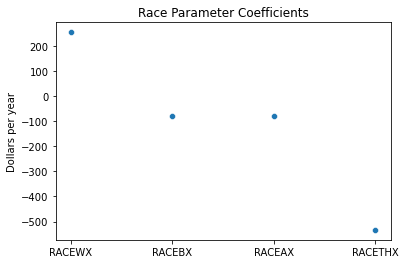

In [20]:
# Extract the coefficients for the variables of interest
race_coeffs = model.params[['RACEWX', 'RACEBX', 'RACEAX', 'RACETHX']]
race_pvals = model.pvalues[['RACEWX', 'RACEBX', 'RACEAX', 'RACETHX']]
race_comb = pd.concat([race_coeffs, race_pvals], axis=1)
race_comb = race_comb.rename(columns={0 : 'coefficients', 1 : 'p_values'})
# Print the coefficients, insert our anchor variab
print(f'Race coefficients: \n{race_comb.sort_values("coefficients", ascending=False)}')
sns.scatterplot(data=race_coeffs.sort_values(ascending=False)).set(title='Race Parameter Coefficients', ylabel='Dollars per year');

Dot plot showing estimator coefficients for all dummy racial variables in ascending order

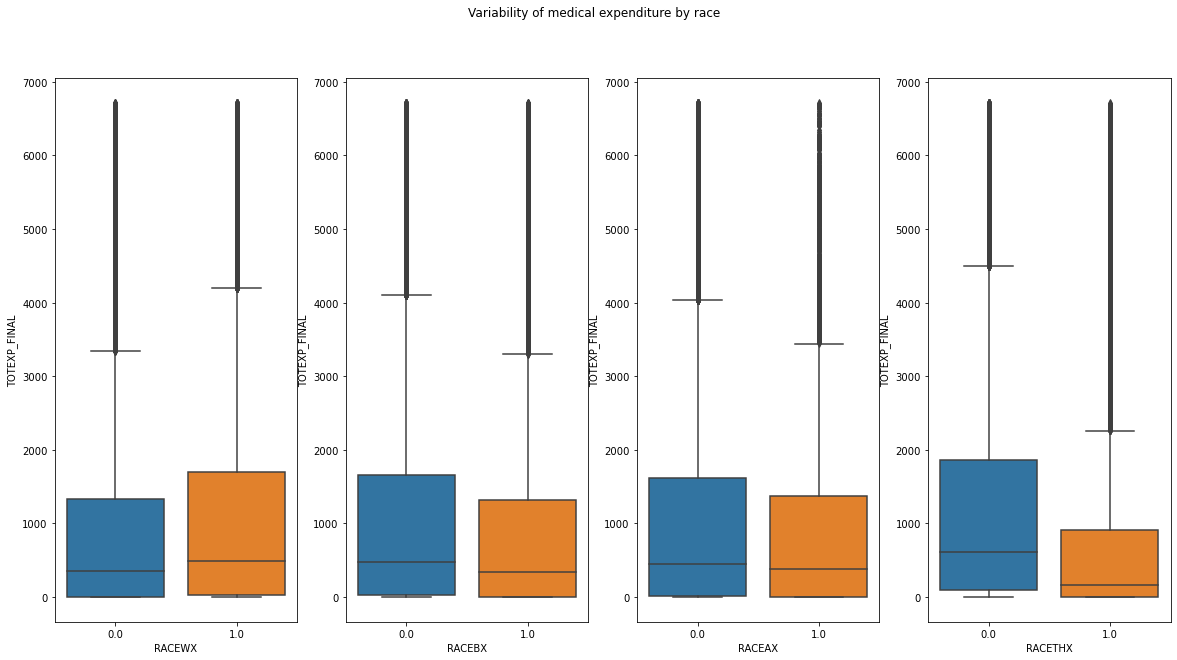

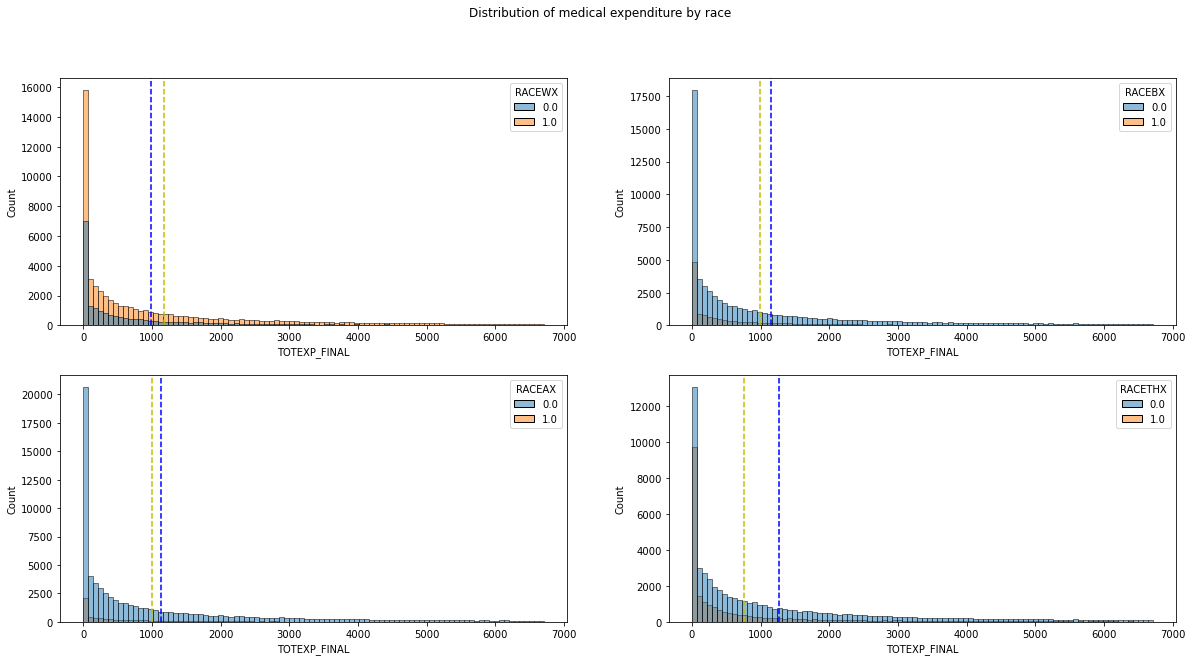

In [21]:
f5, ax5 = plt.subplots(1, 4, figsize=(20, 10))
f5.suptitle('Variability of medical expenditure by race')
sns.boxplot(x='RACEWX', y='TOTEXP_FINAL', data=final, ax=ax5[0])
sns.boxplot(x='RACEBX', y='TOTEXP_FINAL', data=final, ax=ax5[1])
sns.boxplot(x='RACEAX', y='TOTEXP_FINAL', data=final, ax=ax5[2])
sns.boxplot(x='RACETHX', y='TOTEXP_FINAL', data=final, ax=ax5[3])
plt.show()

f7, ax7 = plt.subplots(2, 2, figsize=(20, 10))
f7.suptitle('Distribution of medical expenditure by race')
sns.histplot(x='TOTEXP_FINAL', data=final, hue = 'RACEWX',ax=ax7[0][0])
ax7[0][0].axvline(final[final.RACEWX == 1]['TOTEXP_FINAL'].mean(), color='y', linestyle='--')
ax7[0][0].axvline(final[final.RACEWX != 1]['TOTEXP_FINAL'].mean(), color='b', linestyle='--')
sns.histplot(x='TOTEXP_FINAL', data=final, hue = 'RACEBX',ax=ax7[0][1])
ax7[0][1].axvline(final[final.RACEBX == 1]['TOTEXP_FINAL'].mean(), color='y', linestyle='--')
ax7[0][1].axvline(final[final.RACEBX != 1]['TOTEXP_FINAL'].mean(), color='b', linestyle='--')
sns.histplot(x='TOTEXP_FINAL', data=final, hue = 'RACEAX',ax=ax7[1][0])
ax7[1][0].axvline(final[final.RACEAX == 1]['TOTEXP_FINAL'].mean(), color='y', linestyle='--')
ax7[1][0].axvline(final[final.RACEAX != 1]['TOTEXP_FINAL'].mean(), color='b', linestyle='--')
sns.histplot(x='TOTEXP_FINAL', data=final, hue = 'RACETHX',ax=ax7[1][1])
ax7[1][1].axvline(final[final.RACETHX == 1]['TOTEXP_FINAL'].mean(), color='y', linestyle='--')
ax7[1][1].axvline(final[final.RACETHX != 1]['TOTEXP_FINAL'].mean(), color='b', linestyle='--')
plt.show()

Above plots illustrates the variability of medical expenditure between individuals that hold the specified racial identity and individuals that does not hold the racial identity categorized by racial identities. Yellow line in histogram indicates average annual medical spending for those identify as target race while blue line idicate that of those who does not identify as target race

Observe only those who identify racially as white have an average annual medical spending larger than those who does not identify as White among other racial categories. All coefficients are statistically significant according to our model. Also, among the estimator coefficients, individuals who identify as Latino/Hispanic spend significantly less than others identify as other races, with a astonishing prediction of 532.97$ less per year than those who does not identify as Hispanic. A possible explaination we have on those two observations is that those who identify as Latino/Hispanic on average have lower earnings which causes them to spend less on medical services per year. On the other hand, those who identify as White among other racial categories have on average a higher annual wage amount others, which cause them to spend more on medical services per year.

### Conclusion

Our analysis suggests that, on average, individuals who identify as white have higher medical spending compared to those who do not identify as white. In contrast, individuals identifying with all other races have lower medical expenditures compared to those who does not identify as that specific race.

# Ethics & Privacy

Our project is done in a legal way, and we believe our project will have academic use. Based on that, the whole team members acknowledge that there might have ethical and privacy issues such as potential bias and lack of privacy. We will consider all the possible concerns in the following paragraph.

Our project dataset is about people’s medical expenditure and it consists of medical history, test results and information about them or their families, which reflects a lot about an individual’s health status, lifestyle and vulnerabilities. We use the Medical Expenditure Panel Survey which is a large-scale survey completed by families, individuals, their medical provider and their employees. As researchers, we are aware of how the use of such health data may raise ethical and privacy concerns. Participants have a right to privacy when it comes to highly personal medical data. Participation in MEPS is totally voluntary, there is no penalty and loss if people refuse to participate. Participants have the right to not answer the questions they think are not appropriate. Since the data was collected anonymously, we do not have access to any personally identifying information.

Our dataset does not exclude any particular populations since the participants are of a range of ethnicities, age groups and have a variety of occupations. Thus, our choice of data ensures that the data is representative of the larger population and can help to avoid biases that may arise from only including certain groups in the study. 

We understand that bias and ethical concerns are important considerations in our project as they can significantly impact the accuracy and fairness of the results. Thus, we handle the bias and ethical concerns during different stages of our data processing. 

We aimed to identify potential sources of bias in the data collection process and sample selection, so we removed outliers to anticipate and address potential issues before they become problematic. We are also aware of the importance of using representative data since we are trying to ensure that the data used in the project is representative of the population being studied. If the data is biased, the results will be biased as well. Thus, we carefully selected reliable national surveys and combined datasets collected over a long time period. Ethical considerations also include ensuring the accuracy, completeness, and relevance of the data used in the analysis. Inaccurate or incomplete data can lead to biased results, which can have negative consequences for individuals and communities. Thus, we cleaned and processed our data using reasonable techniques to ensure data credibility. 

At the analysis and post-analysis stages, one ethical concern is the transparency of the analysis. We provide clear and concise explanations of the analysis methods and results in the conclusion and discussion section so that individuals and communities can understand how the conclusions were reached. Another ethical concern is fairness in the interpretation and presentation of the results. We avoid presenting the results in a way that unfairly benefits certain groups or individuals and consider the potential impact of the results, for example, we explained how the data collection method and standards might have had an impact on the results of our regression analysis and did not modify the data or perform the analysis in a certain way that would match our hypotheses. Thus, we recognize and address any unintended consequences of our analysis. 

# Conclusion & Discussion

Health has always been an issue of great importance to people. Medical expenditure is a critical indicator to see people’s health status. In the United States, people always have high medical expenditures, which causes many adults to have trouble affording medical costs. In this project, we would like to see the features of the adults causing a high medical expenditure, which could help people to see how much they will spend on healthcare and select an appropriate health insurance plan.

In this project, we collect the data of total medical expenditure in the US from 2011 to 2020. To ensure no large values drive the relationship, we remove the outliers. We make a lineplot of total medical expenditure to have a general look of how people’s medical expenditure in US change overtime. We can see the overall trend of total medical expenditure in US from 2011 to 2020 is increasing. Then, we perform a multivariate linear regression on the variables we are interested in. The OLS coefficient of 24.32 for the age variable suggests that there is a positive relationship between age and medical expenditure. On average, for every one additional year of age, medical expenditure increases by 24.32 dollar, all other things being equal. So, we can conclude that older people tend to spend more on medical expenditure. From the exploratory data analysis section, the distribution of the BMI values gives a general idea of the proportions of people who are normal, overweight, underweight, obese and extremely obese. The line plot of medical expenditures by obesity status indicates a general increase in costs across all groups by age. And we concluded that people with more extreme BMI values tend to have higher medical expenditures across all age groups. From the regression results, we observe that there is a positive relationship between BMI and medical expenditure as the coefficient of BMI_Merged in the OLS model is 14.7988 with a p-value of 0.000 which is small enough for us to reject the null hypothesis. Thus, on average, people with higher BMI values have higher medical expenditures. About the working hours, we can see that the coefficient of Hours_Merged is -4.5 on our model. The negative coefficient of -4.5 means that on average, for every one additional hour worked, medical expenditure decreases by $4.5. This suggests that individuals who work longer hours tend to have lower medical expenditures than those who work fewer hours, which is counterintuitive. It's important to remember that correlation does not imply causation and It's possible that there are other factors that are driving the observed relationship between working hours and medical expenditure. But now, we can conclude that there is a negative correlation between working hours and medical expenditures. 
Then,we conclude that there is a negative relationship between the smoking behavior and medical expenditure. The boxplot shows a visual comparison between the medical cost from non-smokers and smokers. From the boxplot, we see that on average, smoker spends less on medical expenditure than non-smoker people. The distribution of countplot is right-skewed, implying that most of smokers and non-smokers spend a lower medical expenditure; however, more smokers spend a less cost in medical part. After generating the model, we summarize that on average, smoker spends about 234 dollars less than non-smoker. A small enough p-value (0.000) implies it is statistically significant. Based on our analysis of regional and medical expenditures, we can conclude that an individual's region is correlated with their medical spending. Our analysis suggests that, on average, people living in the Northeast have the highest medical spending, followed by those in the Mideast, then the West. Lastly, individuals residing in the South have the lowest medical spending among the four groups. Regarding race and medical expenditures, we can conclude that an individual's racial characteristics are also correlated with their spending on medical expenses. We analyzed the expenditures of individuals who identify with a specific racial group (white, black, Asian, and Hispanic) compared to those who do not identify with that group. Our findings show that, on average, only individuals who identify as white have higher medical expenditures compared to those who do not identify as white. All other racial groups appear to have lower medical expenditures compared to those who do not identify with the respective racial groups. 


There are some limitation about our project. Firstly, since our data comes from an anonymous and volunteering survey, it is not guaranteed that all the data provided by participants are real and accurate. Also, the method we use here is multivariate linear regression. Although the OLS estimator included 11 variables, there are still potential variables left out of the regression that could be a source of omitted variable bias. Observing the coefficients from SMOKE and HOUR_Merged, it is quite counterintuitive that these factors reduce medical expenditures, suggesting omitted variable bias. One possible explanation is that we omitted wages from the regression, as they were not included in the dataset. It is possible that individuals who smoke or work more hours on average earn less, resulting in a negative relationship between smoking and working hours with medical expenditures. There are some limitation for the smoking feature as well. Since smoker may sign with a higher medical insurance that cover more medical spending, causing smokers spend less on average. On the other hand, some smokers may not care about their health, causing smokers not really often spend time and money on medical aspact. In the course of our analysis, some of the data points exhibiting large fluctuations might be a result of medical insurance coverages since the original datasets did not make clear the effect of insurance policies on data collection. 

# Team Contributions

Baoni Li - Data Cleaning & Data checkpoint & EDA & Conclusion & Video

Huiyi He - Background & Prior Work; Ethics & Privacy & EDA & Conclusion & Video

Jiayi Zhu - Data Cleaning & Data checkpoint & EDA & Conclusion & Video

Yuhan Zhou - Data Cleaning & Data checkpoint & EDA & Conclusion & Video

Yihuan Wang - Background & Prior Work; Ethics & Privacy & EDA & Conclusion & Video

# Video submission location

Our video and slides are both in our group repository!!